# Визуализация трёхмерных данных с использованием matplotlib

Рассматриваются основы создания как трёхмерных графиков, так и двухмерных графиков для визуализации трёхмерных данных.

## Создание трёхмерных осей

Импортируем модуль [pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html):

In [1]:
import matplotlib.pyplot as plt

И создаём трёхмерные оси. Для этого сначала создаём объект окна `fig` класса `plt.figure`,
а затем методом `fig.add_subplot(...)` добавляем к нему ось с ключевым параметром `projection="3d"`:

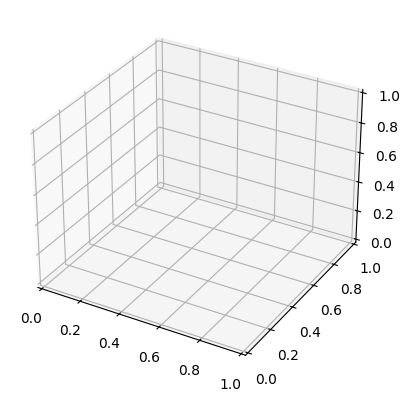

In [2]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

Далее с объектом `ax` можем выполнять все те же операции, что рассматрены в {doc}`basics` и {doc}`improved-matplotlib`.

```{attention}
Создавать трёхмерные графики имеет смысл тогда и только тогда, когда они будут использоваться в интерактивном режиме, т.е. тогда, когда имеется возможность "вертеть" эти графики, рассматривая их со всех сторон и масштабируя.

**Не стоит вставлять изображения трёхмерных графиков в бумажные отчёты!**
```

Построим график такой функции:

$$
f(x, y) = \sin{\sqrt{x^2 + y^2}}
$$

в пределах $x \in [-6, 6]$ и $y \in [-6, 6]$.

## Инициализация данных для визуализации

Импортируем [numpy](https://numpy.org/) и опишем функцию $f(x, y)$:

In [3]:
import numpy as np

def f_sin_xy(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

### Расчётная сетка

Чтобы построить трёхмерный график, необходимо определить каждую пару $(x_i; y_j)$ (комбинацию из двух элементов массивов `x` и `y`), где $i = 1, 2, \dots, N_x$ и $j = 1, 2, \dots, N_y$. Другими словами, нам нужны точки $(x_1; y_1)$, $(x_1; y_2)$, $\dots$, $(x_1; y_{N_y})$, $(x_2; y_1)$, $(x_2; y_2)$, $\dots$, $(x_{N_x}; y_{N_y})$.

Для начала инициализируем два соответствующих массива `x` и `y` в оговорённых пределах по 51 значению в каждом:

In [4]:
x = np.linspace(-6, 6, 51)  # N_x = 51
y = np.linspace(-6, 6, 51)  # N_y = 51

Чтобы их массивов `x` и `y` сформировать расчётную сетку $(x_i; y_j)$, применим функцию [`numpy.meshgrid(...)`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html):

In [5]:
x, y = np.meshgrid(x, y)

Мы получим расчётную сетку размером $N_x \times N_y$. Убеждаемся:

In [6]:
x.shape

(51, 51)

In [7]:
y.shape

(51, 51)

```{important}
Массивы `x` и `y` с этого момента имеют одинаковую форму даже в случае, если бы $N_x \neq N_y$.
```

Теперь мы можем вычислить массив `z` значений функции $f(x, y)$:

In [8]:
z = f_sin_xy(x, y)
z.shape

(51, 51)

Как видим, массив `z` имеет такую же форму, как и массивы `x` и `y` - функция вычислена в каждой точке.
Перейдём к способам визуализации.

## Виды трёхмерных графиков

### Контурный график

Есть три типа контурных графиков:

* в виде линий уровня,
* в виде заполненных цветом промежутков между линиями уровня и
* их комбинация.

#### Линии уровня

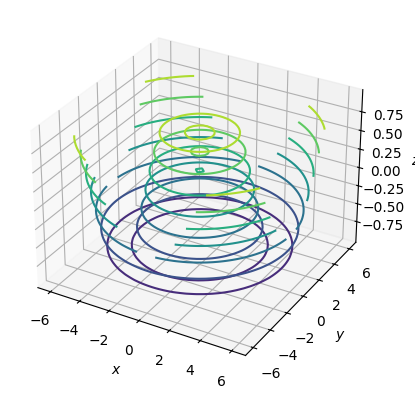

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.contour3D(x, y, z)

ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$");

Линий уровня на рисунке выше маловато. Увеличим их число до 30:

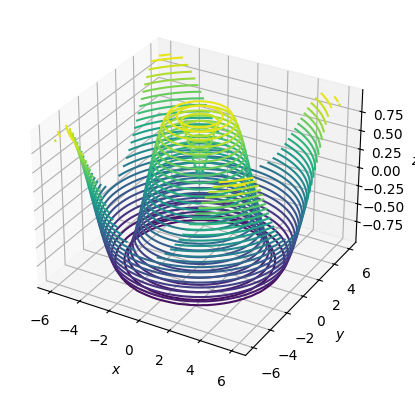

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.contour3D(x, y, z, levels=30)

ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$");

```{note}
Цвет в данном случае определяется значением координаты _z_.
```

Стоит отметить, что общий стиль графиков также можно изменять с помощью стилевого контекста:

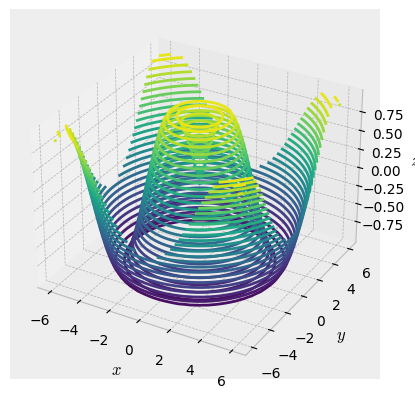

In [11]:
with plt.style.context("bmh"):
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")

    ax.contour3D(x, y, z, levels=30)

    ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$")

#### Заполненные контуры

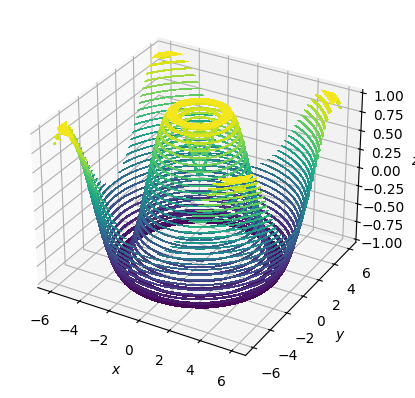

In [12]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.contourf3D(x, y, z, levels=30)  # Буква "f" добавилась к названию "contour"

ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$");

```{attention}
Не стоит применять такой график.
```

### Каркас

Представляет из себя набор прямых, соединяющих ближайшие соседние точки:

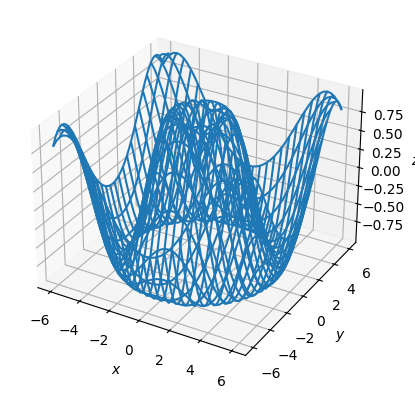

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.plot_wireframe(x, y, z)

ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$");

### Поверхностный график

Представляет собой заполненные цветом плоскости, образованные ближайшими соседними точками, т.е. области, ограниченные рёбрами каркасного графика:

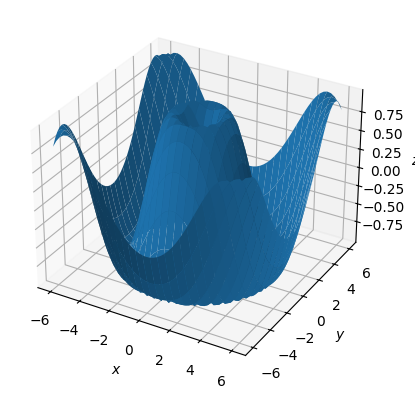

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.plot_surface(x, y, z)

ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$");

Можно задать конкретный цвет графика через параметр `color` или `c`:

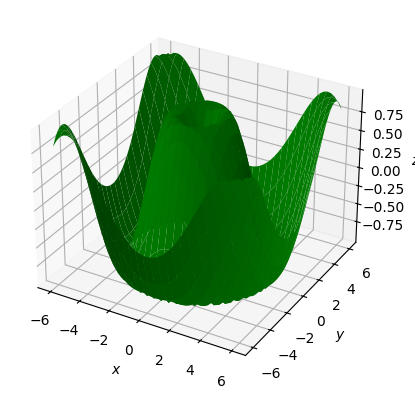

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.plot_surface(x, y, z, color="green")

ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$");

Или задать [цветовую схему](https://matplotlib.org/stable/tutorials/colors/colormaps.html) `cmap` (color map), например `viridis`.
Тогда цвет будет показывать относительную величину _z_-координаты.

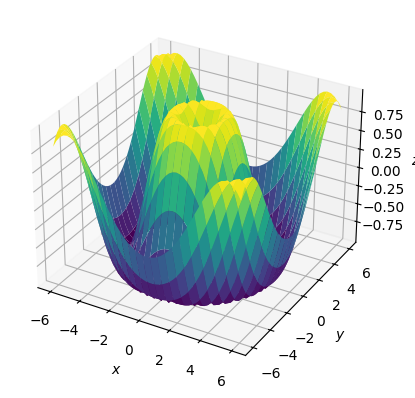

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.plot_surface(x, y, z, cmap="viridis")

ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$");

### Точечный график

Изобразим трёхмерные точки:

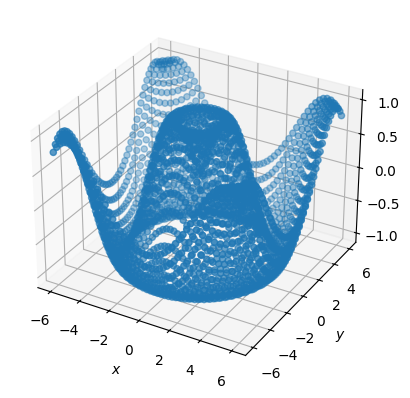

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.scatter3D(x, y, z)

ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$");

Можно поставить цвет точки в зависимость от значений той или иной координаты графика.
Это делается через параметр цвета `c`, которому присваивается желаемый массив, например, `z`:

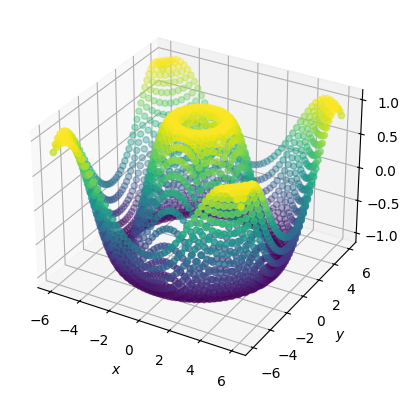

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.scatter3D(x, y, z, c=z)

ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$");

Или свяжем цвет с координатой _x_:

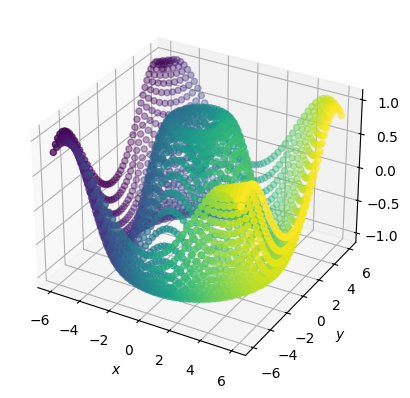

In [19]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.scatter3D(x, y, z, c=x)

ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$");

Или, и вовсе, сделаем выражением $(x - y)^2$:

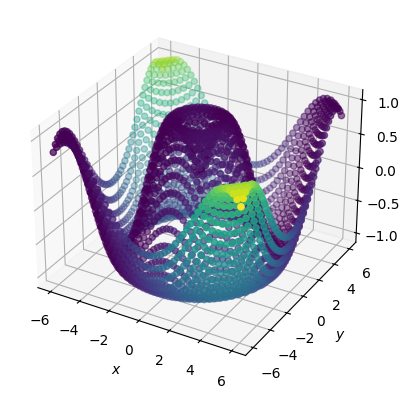

In [20]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.scatter3D(x, y, z, c=(x-y)**2)

ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$");

```{attention}
У данного типа графика (`scatter3D`) нет параметра `color`, только `c`.
```

### Триангулированная поверхность

Данный тип графиков несколько особенный.
Это объясняется его предназначением - таким способом строят сложные поверхности с неравномерной сеткой.
Примером такой поверхности может быть сфера, тор и т.п.
То есть точки для данного графика могут быть расположены в пространстве произвольным образом и на вход должны подаваться в виде одномерных массивов `x`, `y`, `z`.

Переиницилизируем массивы `x` и `y`, причём заполним их случайными значениями, и пересчитаем массив `z`:

In [21]:
x = np.random.uniform(-6, 6, 1001)
y = np.random.uniform(-6, 6, 1001)
z = f_sin_xy(x, y)
x.shape, y.shape, z.shape

((1001,), (1001,), (1001,))

Убедимся, что эти точки расположены в пространстве хаотично, построив точечный график:

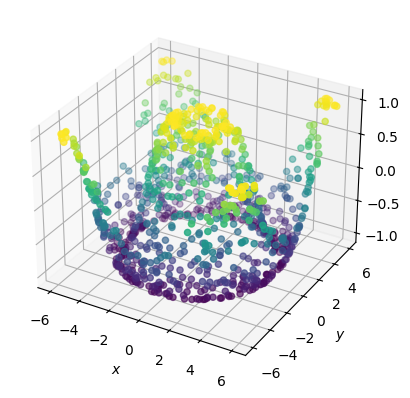

In [22]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.scatter3D(x, y, z, c=z)

ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$");

Очевидно, что точки действительно расположены в плоскости $Oxy$ случайным образом.

Теперь построим триангулированную поверхность:

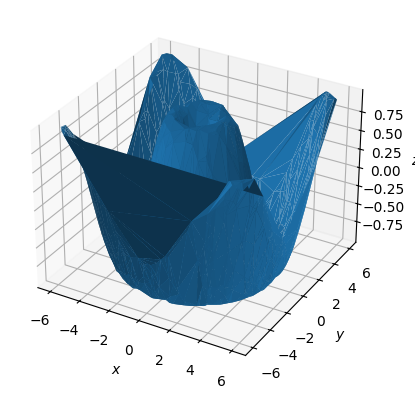

In [23]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.plot_trisurf(x, y, z)

ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$");

Триангулированные поверхности строятся как выпуклые оболочки, этим и достигается возможность однозначного связывания точек.

```{note}
Очевидно, что поверхность будет тем качественнее, чем большее количество точек задано.
```

```{important}
К настоящему моменту после просмотра ряда неинтерактивных трёхмерных графиков должно сформироваться понимание их малой информативности и ценности при использовании в бумажных (плоских) отчётах.
Поэтому далее рассмотрим двумерные способы визуализации трёхмерных данных.
```

Стоит отметить, что возможно строить и трёхмерные кривые (и прямые), а также плоские кривые и точки, лежащие в одной плоскости, в трёхмерных осях.

## Двухмерные способы визуализации трёхмерных данных

Будем визуализировать всё ту же функцию $f(x, y) = \sqrt{x^2 + y^2}$.

Актуализируем массивы `x`, `y`, `z`:

In [24]:
x, y = np.meshgrid(
    np.linspace(-6, 6, 51),
    np.linspace(-6, 6, 51)
)
z = f_sin_xy(x, y)

Как видите, массивы инициализированы абсолютно так же, как и для построения трёхмерных графиков.
В общем и целом, методы построения графиков двухмерных визуализаций 3D-данных те же, что описаны выше.

### Линии уровня

Метод `plt.axis.contour(...)` построит нам линии уровня, как если бы мы смотрели на 3D-график сверху:

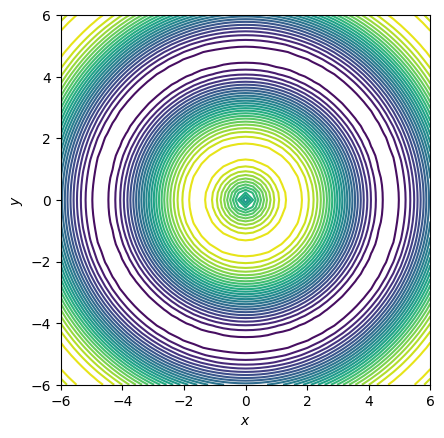

In [25]:
fig, ax = plt.subplots()

ax.contour(x, y, z, levels=30)

ax.set(xlabel="$x$", ylabel="$y$", aspect="equal");

Однако по сравнению с 3D-графиками у нас явно остутствует третья ось - _z_.
Это приводит к тому, что не ясны значения цветов - видно лишь качественное поведение графика, но не видны абсолютные значения `z`, стоящие за ним. Исправить ситуацию поможет цветовая шкала (colorbar):

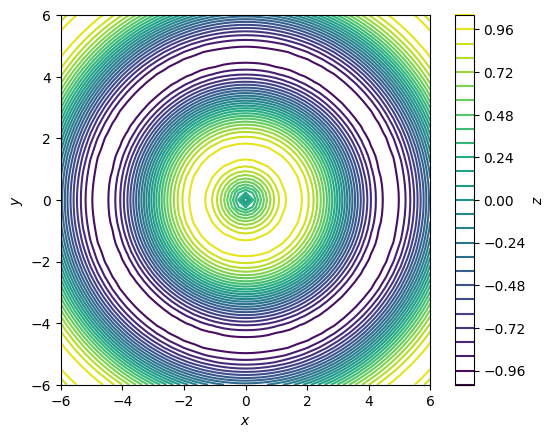

In [26]:
fig, ax = plt.subplots()

# Сохраняем изображение оси:
# именно на этом этапе цвета cmap связываются с данными z
image = ax.contour(x, y, z, levels=30)
# Используем это изображение для цветовой шкалы.
# Заодно присвоем шкале метку недостающей оси z
fig.colorbar(image, ax=ax, label="$z$")

ax.set(xlabel="$x$", ylabel="$y$", aspect="equal");

Вместо цветовой шкалы можно применить и другой подход - показывать абсолютные значения _z_ прямо на линиях уровня (только число линий уровня нужно сделать небольшим):

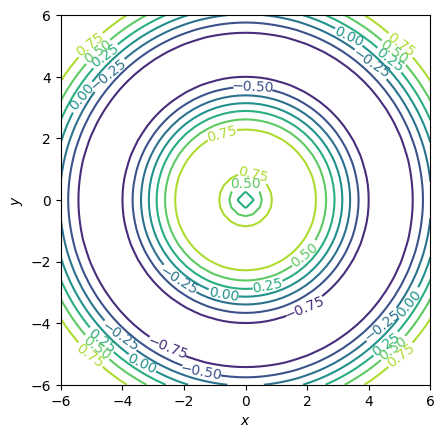

In [27]:
fig, ax = plt.subplots()

# Сохраняем связь контуров с цветовой схемой
contours = ax.contour(x, y, z)
# и используем для инициализации меток в этих контурах
ax.clabel(contours, inline=True)

ax.set(xlabel="$x$", ylabel="$y$", aspect="equal");

### Заполненные контуры

Аналогично `contourf3D(...)` функция `plt.axis.contourf(...)` строит линии уровня, линейно заполняя цветом пространство между ними. Для разнообразия используем стиль *dark_background*:

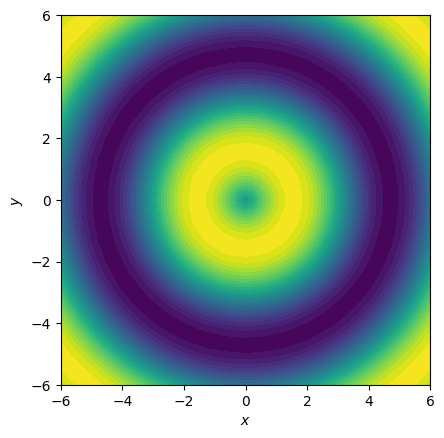

In [28]:
fig, ax = plt.subplots()
ax.contourf(x, y, z, levels=30)
ax.set(xlabel="$x$", ylabel="$y$", aspect="equal");

В данном случае так же не хватает значений третьей оси. Добавим цветовую шкалу:

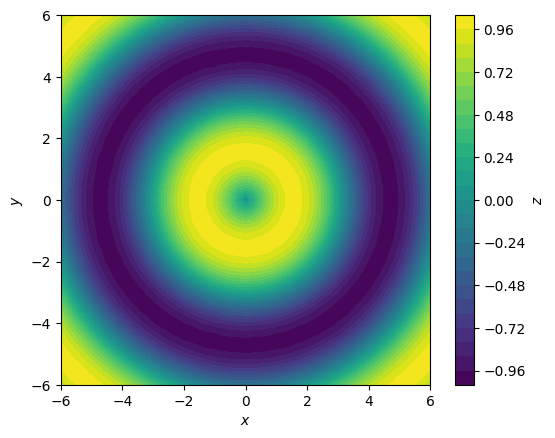

In [29]:
fig, ax = plt.subplots()
contours = ax.contourf(x, y, z, levels=30)
fig.colorbar(contours, ax=ax, label="$z$")
ax.set(xlabel="$x$", ylabel="$y$", aspect="equal");

### Заполненный контур с линиями уровня

Для этого достаточно построить заполненный контур, а затем построить линии уровня.
Главное, чтобы линии уровня хорошо выделялись на фоне цветов заполненного контура.
Для этого сделаем линии уровня красными (`cmap="Reds"`):

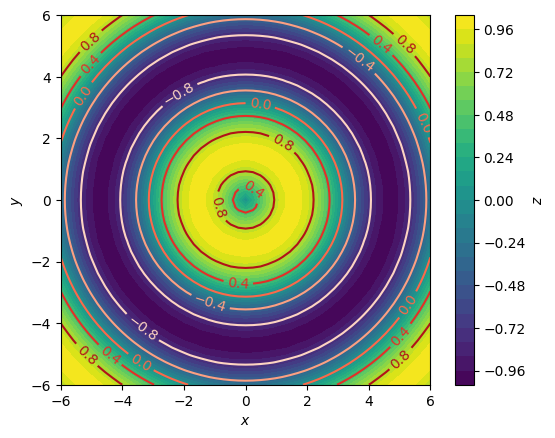

In [30]:
fig, ax = plt.subplots()
# Строим заполненный контур
contours = ax.contourf(x, y, z, levels=30)
# и связанную с ним цветовую шкалу.
fig.colorbar(contours, ax=ax, label="$z$")
# Строим красные линии уровня
contours = ax.contour(x, y, z, levels=5, cmap="Reds")
# с метками значений на линии.
ax.clabel(contours, inline=True)
ax.set(xlabel="$x$", ylabel="$y$", aspect="equal");

### График разброса (точечный)

Аналогичную функции `plt.axis.scatter3D(...)` работу выполняет метод `plt.axis.scatter(...)`:

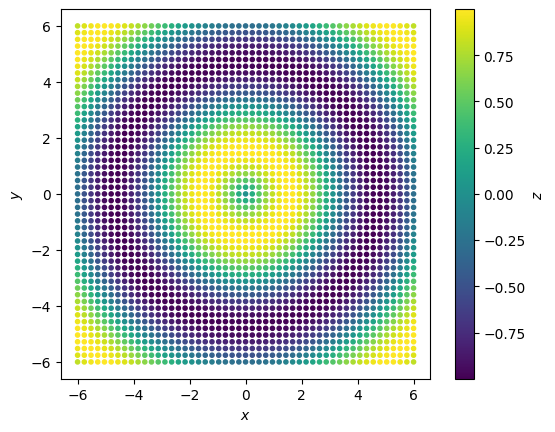

In [31]:
fig, ax = plt.subplots()
# Обратите внимание, что z не передаётся как координата,
# вместо этого z имеет смысл для инициализации цвета
points = ax.scatter(x, y, c=z, marker=".")
fig.colorbar(points, ax=ax, label="$z$")
ax.set(xlabel="$x$", ylabel="$y$", aspect="equal");

Создадим случайные массивы `x` и `y` и пересчитаем `z`:

In [32]:
x = np.random.uniform(-6, 6, 1001)
y = np.random.uniform(-6, 6, 1001)
z = f_sin_xy(x, y)

Снова построим график разброса:

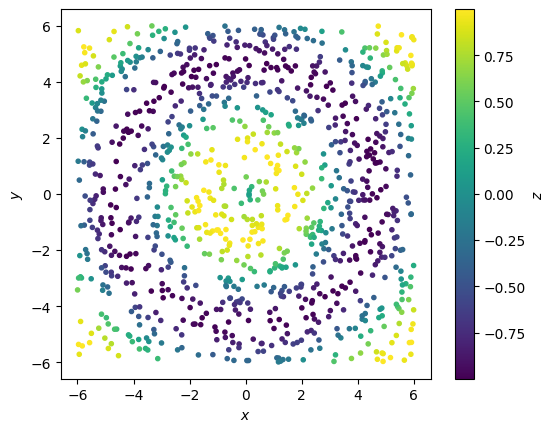

In [33]:
fig, ax = plt.subplots()
points = ax.scatter(x, y, c=z, marker=".")
fig.colorbar(points, ax=ax, label="$z$")
ax.set(xlabel="$x$", ylabel="$y$", aspect="equal");

Удобство и информативность двумерных графиков трёхмерных данных очевидна.

```{important}
Используйте двумерные способы визуализации трёхмерных данных при оформлении бумажных отчётов по своим работам.
Трёхмерную визуализацию оставьте для интерактивных способов публикации своих результатов.
```